<div style="width: 38.5%;">
    <p><strong>City College of San Francisco</strong><p>
    <hr>
    <p>MATH 108 - Foundations of Data Science</p>
</div>

# Lecture 23: Confidence Intervals

Associated Textbook Sections: [13.0, 13.1, 13.2](https://inferentialthinking.com/chapters/13/Estimation.html)

<h2>Set Up the Notebook<h2>

In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore", category=UserWarning) # hide a UserWarning linked to the datascience library

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lecture-23:-Confidence-Intervals" data-toc-modified-id="Lecture-23:-Confidence-Intervals-1">Lecture 23: Confidence Intervals</a></span><ul class="toc-item"><li><span><a href="#Set-Up-the-Notebook" data-toc-modified-id="Set-Up-the-Notebook-1.1">Set Up the Notebook</a></span></li><li><span><a href="#" data-toc-modified-id="-1.2"></a></span></li><li><span><a href="#Percentiles" data-toc-modified-id="Percentiles-1.3">Percentiles</a></span><ul class="toc-item"><li><span><a href="#Computing-Percentiles" data-toc-modified-id="Computing-Percentiles-1.3.1">Computing Percentiles</a></span></li><li><span><a href="#The-percentile-Function" data-toc-modified-id="The-percentile-Function-1.3.2">The percentile Function</a></span></li><li><span><a href="#Demo:-Percentiles" data-toc-modified-id="Demo:-Percentiles-1.3.3">Demo: Percentiles</a></span></li></ul></li><li><span><a href="#Estimation" data-toc-modified-id="Estimation-1.4">Estimation</a></span><ul class="toc-item"><li><span><a href="#Inference:-Estimation" data-toc-modified-id="Inference:-Estimation-1.4.1">Inference: Estimation</a></span></li><li><span><a href="#Demo:-Sample-Median-Estimation" data-toc-modified-id="Demo:-Sample-Median-Estimation-1.4.2">Demo: Sample Median Estimation</a></span></li><li><span><a href="#Variability-of-the-Estimate" data-toc-modified-id="Variability-of-the-Estimate-1.4.3">Variability of the Estimate</a></span></li><li><span><a href="#Demo:-Variability-of-the-Estimate" data-toc-modified-id="Demo:-Variability-of-the-Estimate-1.4.4">Demo: Variability of the Estimate</a></span></li><li><span><a href="#Quantifying-Uncertainty" data-toc-modified-id="Quantifying-Uncertainty-1.4.5">Quantifying Uncertainty</a></span></li><li><span><a href="#Demo:-Quantifying-Uncertainty" data-toc-modified-id="Demo:-Quantifying-Uncertainty-1.4.6">Demo: Quantifying Uncertainty</a></span></li><li><span><a href="#Where-to-Get-Another-Sample?" data-toc-modified-id="Where-to-Get-Another-Sample?-1.4.7">Where to Get Another Sample?</a></span></li></ul></li><li><span><a href="#The-Bootstrap" data-toc-modified-id="The-Bootstrap-1.5">The Bootstrap</a></span><ul class="toc-item"><li><span><a href="#The-Bootstrap" data-toc-modified-id="The-Bootstrap-1.5.1">The Bootstrap</a></span></li><li><span><a href="#Why-the-Bootstrap-Works" data-toc-modified-id="Why-the-Bootstrap-Works-1.5.2">Why the Bootstrap Works</a></span></li><li><span><a href="#Why-We-Need-the-Bootstrap" data-toc-modified-id="Why-We-Need-the-Bootstrap-1.5.3">Why We Need the Bootstrap</a></span></li><li><span><a href="#Real-World-vs.-Bootstrap-World" data-toc-modified-id="Real-World-vs.-Bootstrap-World-1.5.4">Real World vs. Bootstrap World</a></span></li><li><span><a href="#The-Bootstrap-Principle" data-toc-modified-id="The-Bootstrap-Principle-1.5.5">The Bootstrap Principle</a></span></li><li><span><a href="#Key-to-Resampling" data-toc-modified-id="Key-to-Resampling-1.5.6">Key to Resampling</a></span></li><li><span><a href="#Demo:-Bootstrap" data-toc-modified-id="Demo:-Bootstrap-1.5.7">Demo: Bootstrap</a></span></li></ul></li><li><span><a href="#Confidence-Intervals" data-toc-modified-id="Confidence-Intervals-1.6">Confidence Intervals</a></span><ul class="toc-item"><li><span><a href="#95%-Confidence-Interval" data-toc-modified-id="95%-Confidence-Interval-1.6.1">95% Confidence Interval</a></span></li><li><span><a href="#Demo:-Confidence-Intervals" data-toc-modified-id="Demo:-Confidence-Intervals-1.6.2">Demo: Confidence Intervals</a></span></li><li><span><a href="#Visualizing-Confidence" data-toc-modified-id="Visualizing-Confidence-1.6.3">Visualizing Confidence</a></span></li></ul></li></ul></li></ul></div>

## Percentiles

### Computing Percentiles

The Xth percentile is first value on the sorted list that is at least as large as X% of the elements. 

The 80th percentile of `[1, 7, 3, 9, 5]` is the 4th ordered (`[1, 3, 5, 7, 9]`) element, 7:

* $(80/100) \cdot 5 = 4$
* `percentile(80, s)` returns `7`

For a percentile that does not exactly correspond to an element, take the next greater element instead

### The percentile Function

* The pth percentile is the smallest value in a set that is at least as large as p% of the elements in the set
* Function in the datascience module: `percentile(p, values)`
    * `p` is between 0 and 100
    * `values` is an array, list, etc.
    * Returns the pth percentile of the array

### Demo: Percentiles

Compute the 55th percentile of the following array.

In [3]:
x = make_array(43, 20, 51, 7, 28, 34)

In [4]:
percentile(55, x)

34

Sort the array

In [5]:
np.sort(x)

array([ 7, 20, 28, 34, 43, 51])

Calculate the value of the index corresponding to the percentile. Round up the value.

In [6]:
55 / 100 * 6

3.3000000000000003

## Estimation

### Inference: Estimation

How do we calculate the value of an unknown parameter?
* If you have a census (that is, the whole population): Just calculate the parameter and you're done
* If you don't have a census:
    * Take a random sample from the population
    * Use a statistic as an estimate of the parameter

### Demo: Sample Median Estimation

Load the [2021 Employee Compensation data from data.sfgov.org](https://data.sfgov.org/City-Management-and-Ethics/Employee-Compensation/88g8-5mnd).

In [13]:
sf_Complete = Table.read_table('https://data.sfgov.org/resource/88g8-5mnd.csv?year=2021')
sf_Complete.show(3)

organization_group_code,job_family_code,job_code,year_type,year,organization_group,department_code,department,union_code,union,job_family,job,employee_identifier,salaries,overtime,other_salaries,total_salary,retirement,health_and_dental,other_benefits,total_benefits,total_compensation
1,1000,1032,Calendar,2021,Public Protection,ADP,Adult Probation,21,"Prof & Tech Eng, Local 21",Information Systems,IS Trainer-Journey,47369836,107167,0,0,107167,23017.6,15979.3,8022.93,47019.8,154187
1,1000,1041,Calendar,2021,Public Protection,ADP,Adult Probation,21,"Prof & Tech Eng, Local 21",Information Systems,IS Engineer-Assistant,47359929,132523,0,0,132523,27821.3,15979.3,10320,54120.6,186644
1,1000,1053,Calendar,2021,Public Protection,ADP,Adult Probation,21,"Prof & Tech Eng, Local 21",Information Systems,IS Business Analyst-Senior,45916094,12533.2,0,97.66,12630.9,2830,1536.31,988.06,5354.37,17985.3


Reduce the table to the `job`, `total_salary`, and `total_compensation` columns.

In [14]:
sf_Complete = sf_Complete.select('job', 'total_salary', 'total_compensation')
sf_Complete.show(3)

job,total_salary,total_compensation
IS Trainer-Journey,107167,154187
IS Engineer-Assistant,132523,186644
IS Business Analyst-Senior,12630.9,17985.3


Who is making the most money?

In [15]:
sf_Complete.sort('total_compensation', descending=True)

job,total_salary,total_compensation
District Attorney,309905,410754
Assistant Chief Attorney 1,268859,355220
Chief Atty1 (Civil & Criminal),268231,354672
"Head Atty, Civil & Criminal",263625,350042
Dep Dir IV,259015,347507
Assistant Chief Attorney 1,260609,347152
"Head Atty, Civil & Criminal",259509,343000
Assistant Chief Attorney 1,257029,342047
Assistant Chief Attorney 1,255529,340600
Attorney (Civil/Criminal),250259,334712


Visually explore the distribution of compensations.

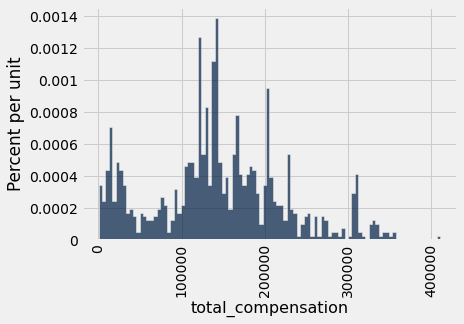

In [16]:
sf_Complete.select('total_compensation').hist(bins=100)

Filter out the bottom 5% and top 5% of compensations.

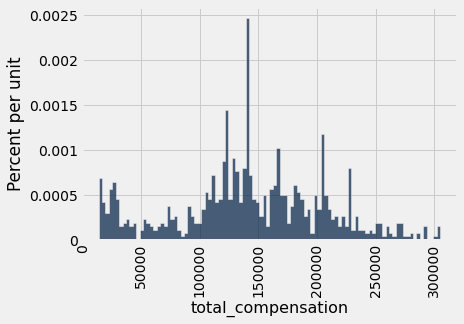

In [17]:
bottom_5 = percentile(5, sf_Complete.column('total_compensation'))
top_5 = percentile(95, sf_Complete.column('total_compensation'))
sf = sf_Complete.where('total_compensation', are.between_or_equal_to(bottom_5, top_5))
sf.select('total_compensation').hist(bins=100)

Calculate the median total compensation of this population.

In [20]:
pop_median = percentile(50, sf.column('total_compensation')) # np.median works but demo percentile
print("Median of middle 90% of population:", pop_median)

Median of middle 90% of population: 140198.7


In [34]:
pop_median = percentile(50, sf_Complete.column('total_compensation'))
print("Median of complete population:", pop_median)

Median of complete population: 140198.7


Randomly sample 300 employees from the population and calculate the sample median total compensation.

In [21]:
our_sample = sf.sample(300, with_replacement=False)
our_sample.show(5)

job,total_salary,total_compensation
Manager II,157488,218779
Deputy Court Clerk III,86109.5,131041
Court Reporter,125913,182974
Deputy Court Clerk III,93742.8,140898
Legal Assistant,81164.4,120854


In [22]:
percentile(50, our_sample.column('total_compensation'))

140692.56

Visually compare the distribution of total compensation values for the population and random sample.

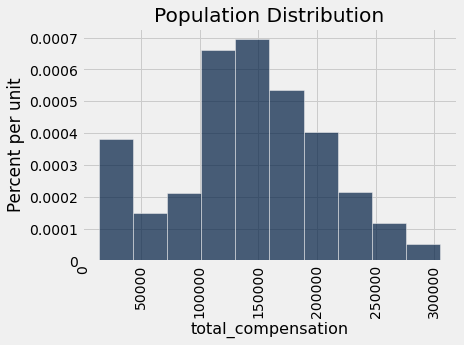

In [23]:
sf.hist('total_compensation', bins=10)
plots.title('Population Distribution');

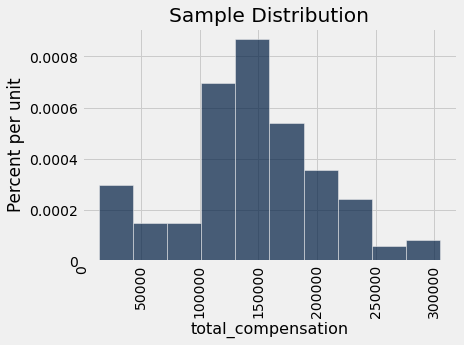

In [24]:
our_sample.hist('total_compensation', bins=10)
plots.title('Sample Distribution');

### Variability of the Estimate

* One sample $\implies$ One estimate
* But the random sample could have come out differently
* And so the estimate could have been different
* **Big question**: How different would it be if we did it again?


### Demo: Variability of the Estimate

Create a function that samples randomly from the `sf` table and returns the sample median for `total_compensation`.

In [28]:
def generate_sample_median(samp_size):
    our_sample = sf.sample(samp_size, with_replacement=False)
    return percentile(50, our_sample.column('total_compensation'))

sample_median = generate_sample_median(300)
sample_median

140653.15

Compute the error if the sample median is used to estimate the population median for total compensation. Re-run the above function to see how the error varies.

In [29]:
error = sample_median - pop_median
error

454.44999999998254

### Quantifying Uncertainty

* The estimate is usually not exactly right: `Estimate = Parameter + Error`
* How accurate is the estimate, usually?
* How big is a typical error?
* When we have a census, we can do this by simulation


### Demo: Quantifying Uncertainty

Generate 1000 random samples of size 300 and calculate the total compensation median for each sample. Store the median values in an array and visualize the sample distribution along with the population mean.

In [30]:
sample_medians = make_array()

for i in np.arange(1000):
    new_median = generate_sample_median(300)
    sample_medians = np.append(sample_medians, new_median)

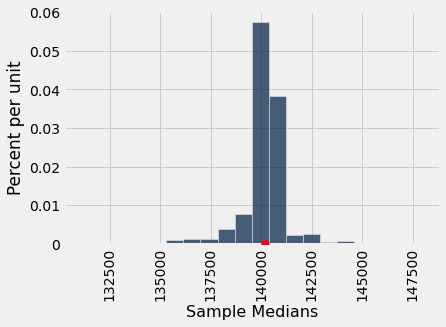

In [31]:
Table().with_column(
    'Sample Medians', sample_medians
).hist(bins = 20)

plots.scatter(pop_median, 0, color="red", s=60, zorder=3);

Visualize the distribution of errors found from using the sample medians to estimate the population median.

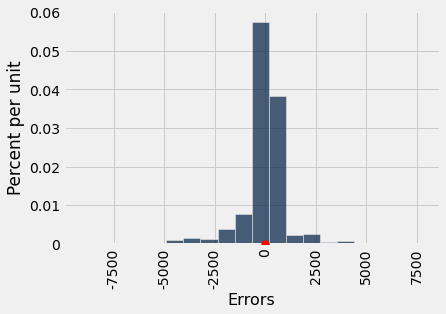

In [32]:
Table().with_column(
    'Errors', sample_medians - pop_median
).hist(bins=20)

plots.scatter(0, 0, color="red", s=60, zorder=3);

### Where to Get Another Sample?

* We want to understand errors of our estimate
* Given the population, we could simulate... but we only have the sample!
* To get many values of the estimate, we needed many random samples
* We can't go back and sample again from the population:
    * No time, no money
    * Stuck?


## The Bootstrap

### The Bootstrap

* A technique for simulating repeated random sampling
* All that we have is the original sample... which is large and random
* Therefore, it probably resembles the population
* So we sample at random from the original sample!

### Why the Bootstrap Works

All of the resamples look pretty **similar**, most likely.

<img src="./img/why_the_bootstrap_works.png" width=90%>

### Why We Need the Bootstrap

<img src="./img/why_we_need_the_bootstrap.png" width=90%>

### Real World vs. Bootstrap World

* Real world:
    * True probability distribution (population)
        * Random sample 1 $\leadsto$ Estimate 1
        * Random sample 2 $\leadsto$ Estimate 2
        * ...
        * Random sample 10000 $\leadsto$ Estimate 10000
* Bootstrap world:
    * Empirical distribution of original sample ("population")
        * Bootstrap sample 1 $\leadsto$ Estimate 1
        * Bootstrap sample 2 $\leadsto$ Estimate 2
        * ...
        * Bootstrap sample 10000 $\leadsto$ Estimate 10000
        
The Hope: these two scenarios are analogous

### The Bootstrap Principle

* The bootstrap principle: Bootstrap-world sampling $\approx$ Real-world sampling 
* Not always true! ... but reasonable if sample is large enough
* We hope that the following are similar to what they are in the real world
    * Variability of bootstrap estimate
    * Distribution of bootstrap errors



### Key to Resampling

* From the original sample,
    * draw at random
    * with replacement
    * as many values as the original sample contained
* The size of the new sample has to be the same as the original one, so that the two estimates are comparable


### Demo: Bootstrap

Take a bootstrap (re)sample (**WITH replacement**) of size 300 from the last sf sample.

Population Median =        140198.7
Our Sample Median =        140653.15
Bootstrap Sample Median =  140692.58


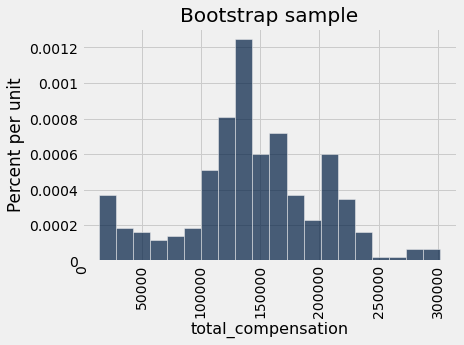

In [35]:
boot_sample = our_sample.sample(300, with_replacement=True)
boot_sample.hist('total_compensation', bins=20)
plots.title('Bootstrap sample');

print("Population Median =       ", pop_median)
print("Our Sample Median =       ", sample_median)
print("Bootstrap Sample Median = ", 
      percentile(50,boot_sample.column('total_compensation')))

Explore the distribution of 1000 bootstrap resamples from the one sample in relation to the sample median and population median.

In [37]:
def one_bootstrap_median():
    single_sample = our_sample.sample()
    return percentile(50, single_sample.column('total_compensation'))

In [39]:
bootstrap_medians = make_array()
for i in np.arange(1000):
    new_median = one_bootstrap_median()
    bootstrap_medians = np.append(bootstrap_medians, new_median)

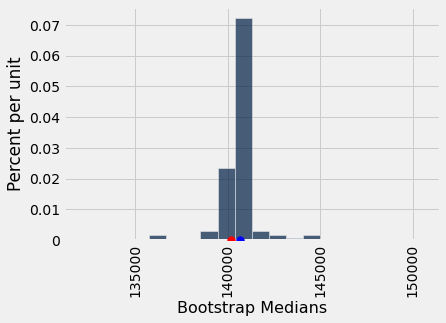

In [40]:
Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins=20)

plots.scatter(pop_median, 0, color="red", s=60, zorder=3);
plots.scatter(sample_median, 0, color="blue", s=60, zorder=3);

## Confidence Intervals

### 95% Confidence Interval

* Interval of estimates of a parameter
* Based on random sampling
* 95% is called the confidence level
    * Could be any percent between 0 and 100
    * Higher level means wider intervals
* The confidence is in the process that gives the interval: It generates a "good" interval about 95% of the time.

### Demo: Confidence Intervals

Make an interval based on the middle 95% of bootstrap samples.

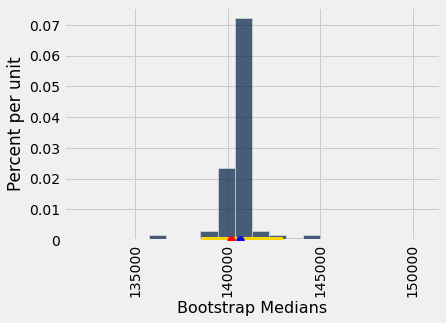

In [41]:
left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)

Table().with_column(
    'Bootstrap Medians', bootstrap_medians
).hist('Bootstrap Medians', bins=20)

plots.plot([left, right], [0,0], color="gold",lw=6, zorder=3);
plots.scatter(pop_median, 0, color="red", s=60, zorder=4);
plots.scatter(sample_median, 0, color="blue", s=60, zorder=4);

### Visualizing Confidence

* Each yellow line in the visual represents a confidence interval from a fresh sample from the population.
* The red line marks the parameter being estimated by the intervals.
* Approximately 95% of the yellow lines intersect the red line.

<img src="./img/visualizing_confidence.png" width=40%>

A similar tool to help visualize the meaning of a confidence interval: [Interpreting Confidence Intervals](https://rpsychologist.com/d3/ci/)

<footer>
    <hr>
    <p>Adopted from UC Berkeley DATA 8 course materials.</p>
    <p>This content is offered under a <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">CC Attribution Non-Commercial Share Alike</a> license.</p>
</footer>